In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [0]:
data = pd.read_csv('/content/household_power_consumption.csv',
                   sep=';',
                   parse_dates=True,
                   low_memory=False)

In [10]:
data.head()

Date      Time  ... Sub_metering_2 Sub_metering_3
0  16/12/2006  17:24:00  ...          1.000           17.0
1  16/12/2006  17:25:00  ...          1.000           16.0
2  16/12/2006  17:26:00  ...          2.000           17.0
3  16/12/2006  17:27:00  ...          1.000           17.0
4  16/12/2006  17:28:00  ...          1.000           17.0

[5 rows x 9 columns]

In [12]:
data['date_time'] = data['Date'].str.cat(data['Time'], sep=' ')
data.drop(['Date', 'Time'], inplace=True, axis=1)
data.head()

Global_active_power  ...            date_time
0               4.216  ...  16/12/2006 17:24:00
1               5.360  ...  16/12/2006 17:25:00
2               5.374  ...  16/12/2006 17:26:00
3               5.388  ...  16/12/2006 17:27:00
4               3.666  ...  16/12/2006 17:28:00

[5 rows x 8 columns]

In [13]:
data.set_index(['date_time'], inplace=True)
data.head()

Global_active_power  ... Sub_metering_3
date_time                                ...               
16/12/2006 17:24:00               4.216  ...           17.0
16/12/2006 17:25:00               5.360  ...           16.0
16/12/2006 17:26:00               5.374  ...           17.0
16/12/2006 17:27:00               5.388  ...           17.0
16/12/2006 17:28:00               3.666  ...           17.0

[5 rows x 7 columns]

In [0]:
data.replace('?', nan, inplace=True)

In [0]:
data = data.astype('float')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 206.7+ MB


In [20]:
np.isnan(data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [0]:
def fill_missing(data):
  one_day = 24*60
  for row in range(data.shape[0]):
    for col in range(data.shape[1]):
      if np.isnan(data[row, col]):
        data[row, col] = data[row-one_day, col]

In [0]:
fill_missing(data.values)

In [25]:
np.isnan(data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [26]:
data.describe()

Global_active_power  ...  Sub_metering_3
count         2.075259e+06  ...    2.075259e+06
mean          1.089418e+00  ...    6.448635e+00
std           1.054678e+00  ...    8.433584e+00
min           7.600000e-02  ...    0.000000e+00
25%           3.080000e-01  ...    0.000000e+00
50%           6.020000e-01  ...    1.000000e+00
75%           1.526000e+00  ...    1.700000e+01
max           1.112200e+01  ...    3.100000e+01

[8 rows x 7 columns]

In [27]:
data.shape

(2075259, 7)

In [28]:
data.head()

Global_active_power  ...  Sub_metering_3
date_time                                 ...                
16/12/2006 17:24:00                4.216  ...            17.0
16/12/2006 17:25:00                5.360  ...            16.0
16/12/2006 17:26:00                5.374  ...            17.0
16/12/2006 17:27:00                5.388  ...            17.0
16/12/2006 17:28:00                3.666  ...            17.0

[5 rows x 7 columns]

## Prepare power consumption for each day

In [0]:
data.to_csv('cleaned_data.csv')

In [0]:
dataset = pd.read_csv('cleaned_data.csv', parse_dates=True, index_col='date_time', low_memory=False)

###Exploratory Data Analysis

In [0]:
data = dataset.resample('D').sum()

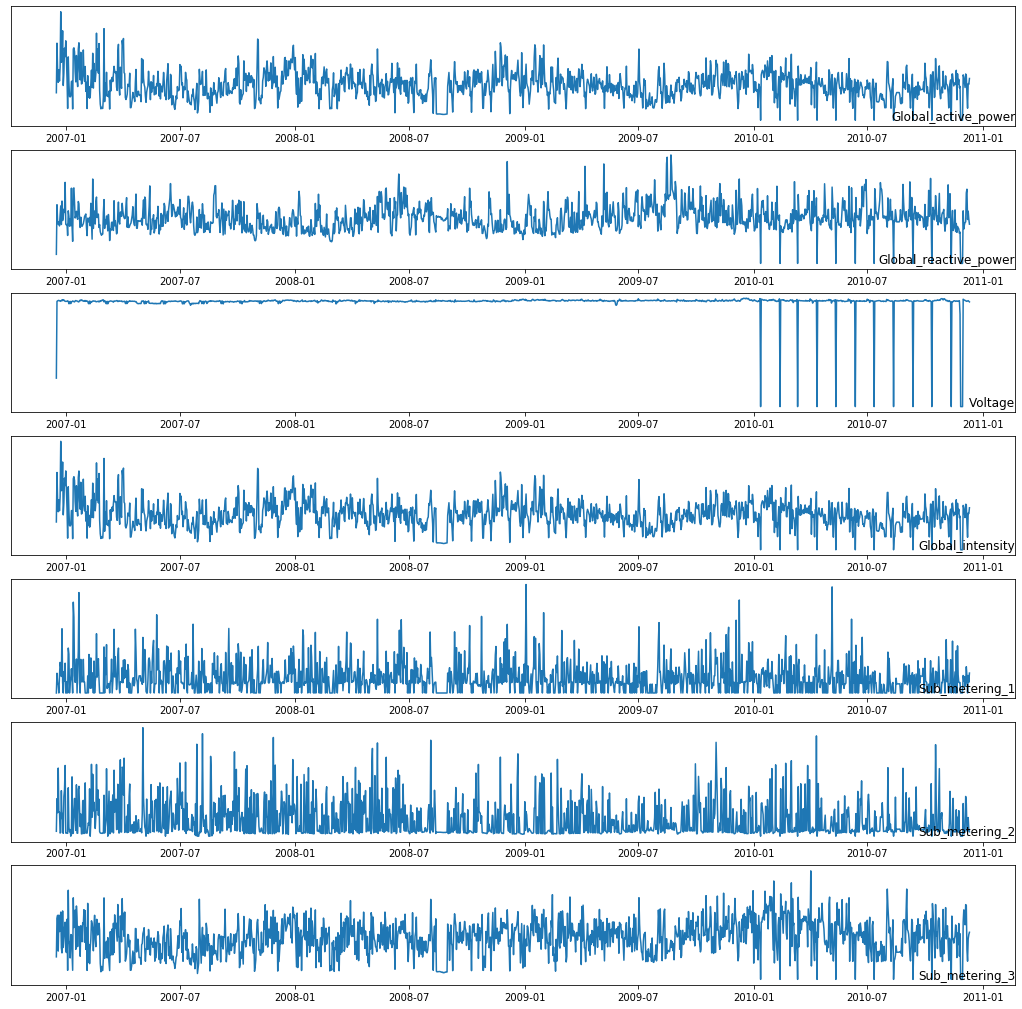

In [35]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(data.columns)):
  plt.subplot(len(data.columns), 1, i+1)
  name = data.columns[i]
  plt.plot(data[name])
  plt.title(name, y=0, loc='right')
  plt.yticks([])
plt.show()
fig.tight_layout()

###Exploring Active Power Consumption for Each Year

In [0]:
years = ['2007', '2008', '2009', '2010']

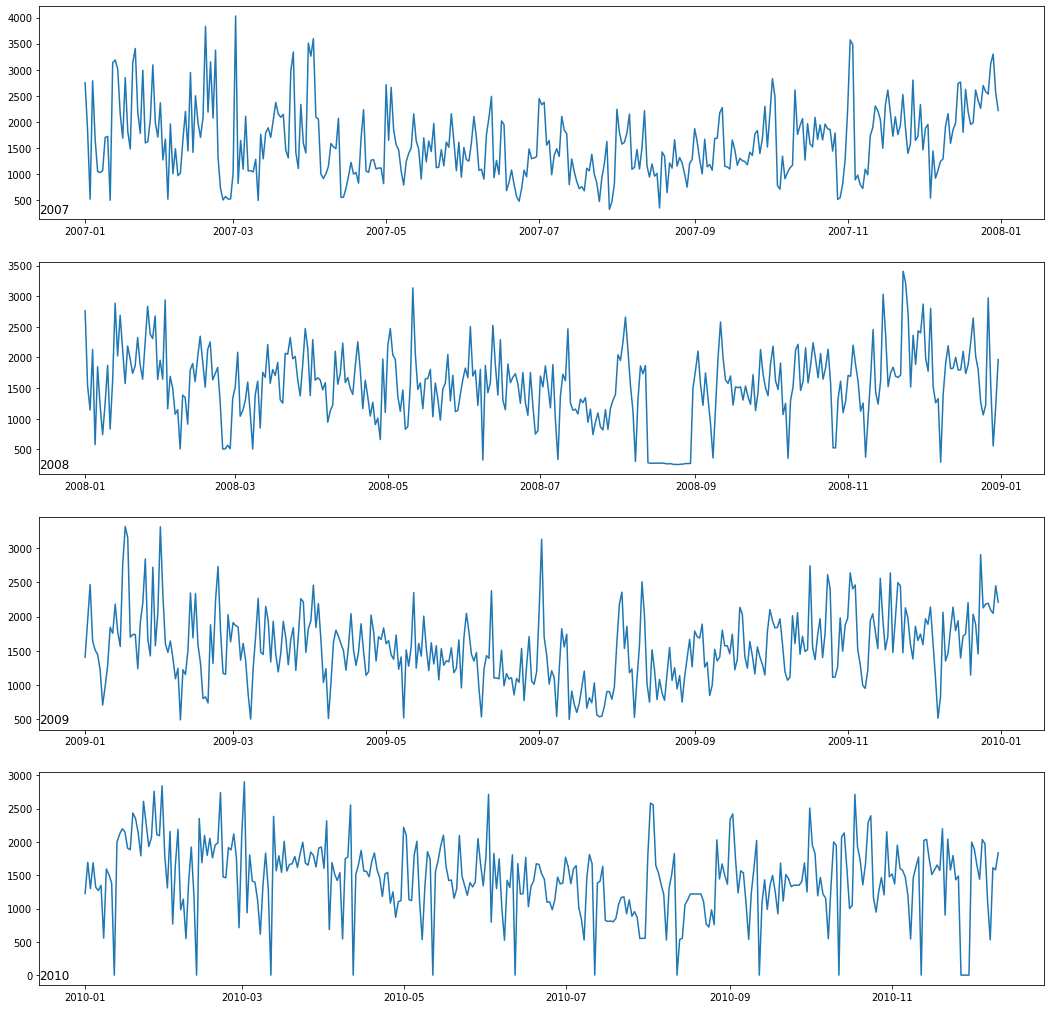

In [38]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(years)):
  plt.subplot(len(years), 1, i+1)
  year = years[i]
  active_power_data = data[str(year)]
  plt.plot(active_power_data['Global_active_power'])
  plt.title(str(year), y=0, loc='left')
plt.show()
fig.tight_layout()

### Power Consumption Distribution with Histogram

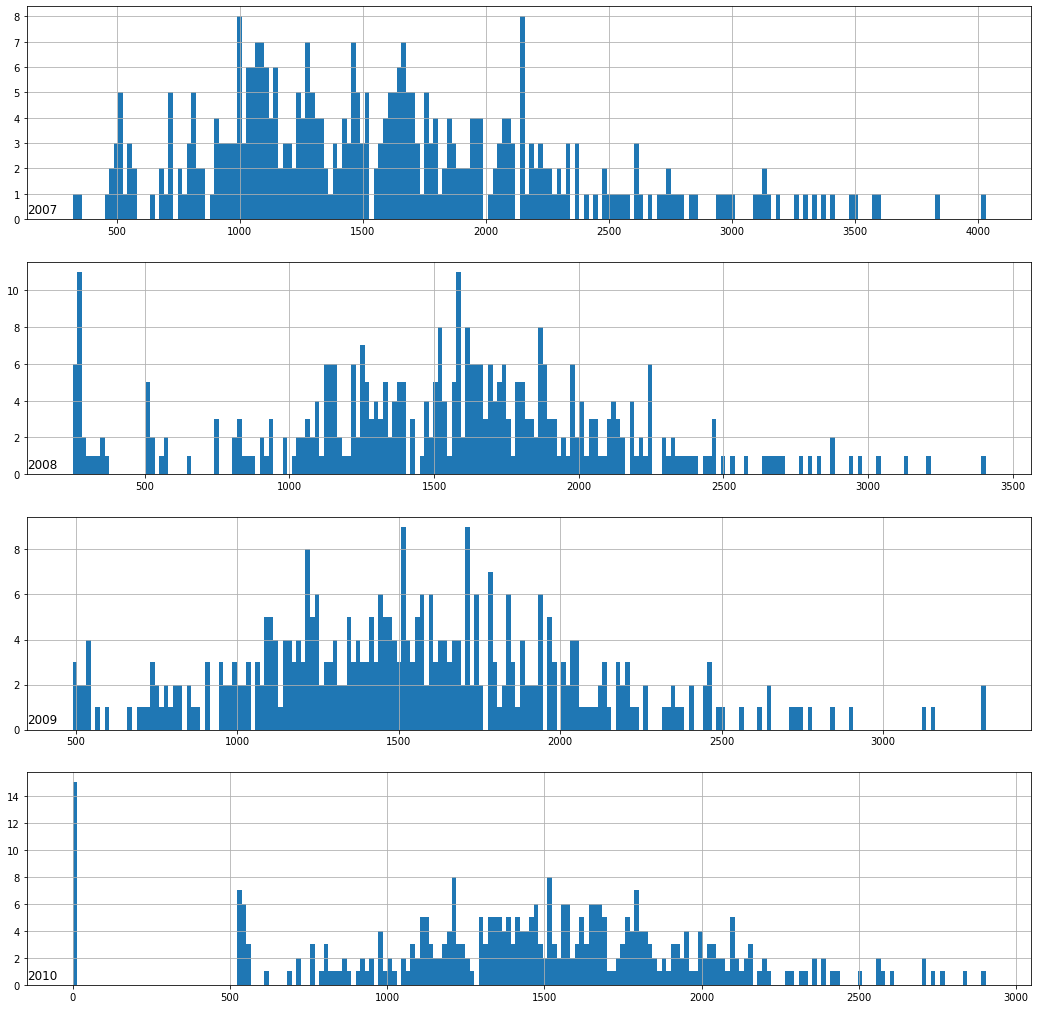

In [41]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(years)):
  plt.subplot(len(years), 1, i+1)
  year = years[i]
  active_power_data = data[str(year)]
  active_power_data['Global_active_power'].hist(bins=200)
  plt.title(str(year), y=0, loc='left')
plt.show()
fig.tight_layout()

###For Full Data

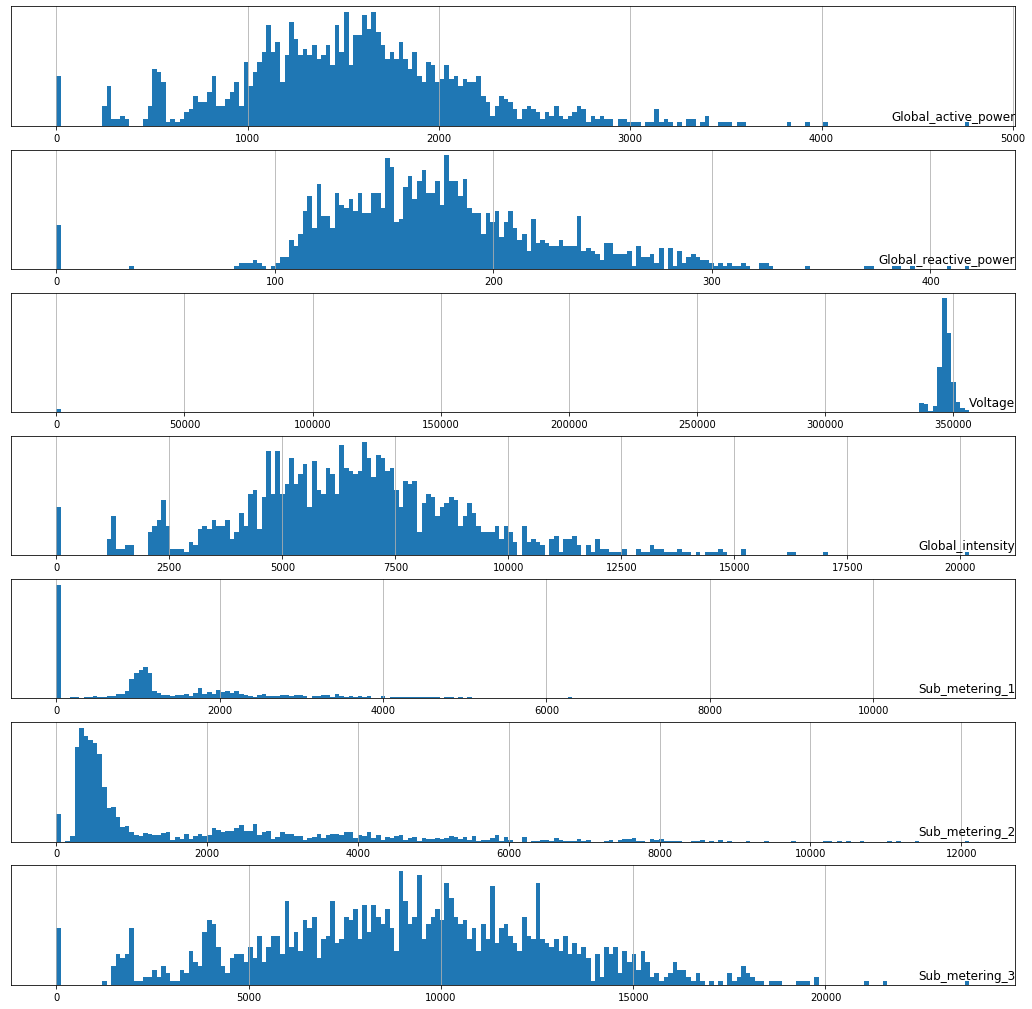

In [42]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(data.columns)):
  plt.subplot(len(data.columns), 1, i+1)
  name = data.columns[i]
  data[name].hist(bins=200)
  plt.title(name, y=0, loc='right')
  plt.yticks([])
plt.show()
fig.tight_layout()

### Plot Power Consumption Histogram for Each Month of 2007

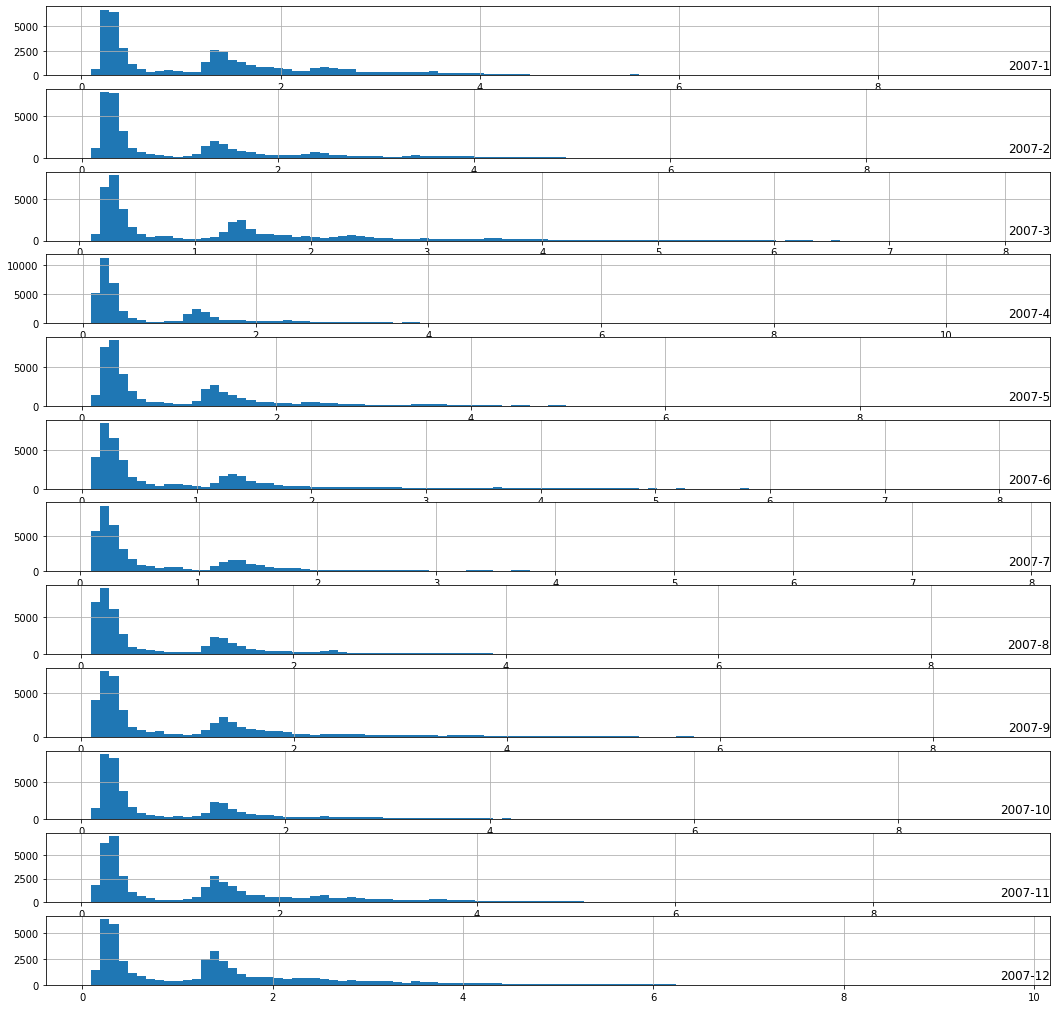

In [43]:
months = [i for i in range(1, 13)]

fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(months)):
  plt.subplot(len(months), 1, i+1)
  month = '2007-' + str(months[i])
  active_power_data = dataset[month]
  active_power_data['Global_active_power'].hist(bins=100)
  ax.set_xlim(0, 5)
  plt.title(month, y=0, loc='right')
plt.show()
fig.tight_layout()

###Predictive Modeling

In [44]:
data.head()

Global_active_power  ...  Sub_metering_3
date_time                        ...                
2006-12-16             1209.176  ...          4926.0
2006-12-17             3390.460  ...         13341.0
2006-12-18             2203.826  ...         14018.0
2006-12-19             1666.194  ...          6197.0
2006-12-20             2225.748  ...         14063.0

[5 rows x 7 columns]

In [46]:
data.tail()

Global_active_power  ...  Sub_metering_3
date_time                        ...                
2010-12-07             1109.574  ...          6444.0
2010-12-08              529.698  ...          3982.0
2010-12-09             1612.092  ...          8891.0
2010-12-10             1579.692  ...          9812.0
2010-12-11             1836.822  ...         10308.0

[5 rows x 7 columns]

In [56]:
data_train = data.loc[:'2009-12-31', :]['Global_active_power']
data_train.head()

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Freq: D, Name: Global_active_power, dtype: float64

In [57]:
data_test = data['2010']['Global_active_power']
data_test.head()

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
Freq: D, Name: Global_active_power, dtype: float64

In [58]:
data_train.shape

(1112,)

In [59]:
data_test.shape

(345,)

###Prepare Training Data

In [61]:
data_train.head(14)

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
2006-12-21    1723.288
2006-12-22    2341.338
2006-12-23    4773.386
2006-12-24    2550.012
2006-12-25    2743.120
2006-12-26    3934.110
2006-12-27    1528.760
2006-12-28    2072.638
2006-12-29    3174.392
Freq: D, Name: Global_active_power, dtype: float64

In [0]:
data_train = np.array(data_train)

In [0]:
X_train, y_train = [], []

for i in range(7, len(data_train)-7):
  X_train.append(data_train[i-7:i])
  y_train.append(data_train[i:i+7])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [65]:
X_train.shape, y_train.shape

((1098, 7), (1098, 7))

In [66]:
pd.DataFrame(X_train)

0         1         2         3         4         5         6
0     1209.176  3390.460  2203.826  1666.194  2225.748  1723.288  2341.338
1     3390.460  2203.826  1666.194  2225.748  1723.288  2341.338  4773.386
2     2203.826  1666.194  2225.748  1723.288  2341.338  4773.386  2550.012
3     1666.194  2225.748  1723.288  2341.338  4773.386  2550.012  2743.120
4     2225.748  1723.288  2341.338  4773.386  2550.012  2743.120  3934.110
...        ...       ...       ...       ...       ...       ...       ...
1093  2138.814  1794.862  1940.116  1394.874  1717.182  1744.706  2204.334
1094  1794.862  1940.116  1394.874  1717.182  1744.706  2204.334  1144.166
1095  1940.116  1394.874  1717.182  1744.706  2204.334  1144.166  2034.966
1096  1394.874  1717.182  1744.706  2204.334  1144.166  2034.966  1888.022
1097  1717.182  1744.706  2204.334  1144.166  2034.966  1888.022  1455.200

[1098 rows x 7 columns]

In [0]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

In [0]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [71]:
pd.DataFrame(y_train)

0         1         2         3         4         5         6
0     1.000000  0.608483  0.659577  0.974702  0.338269  0.482174  0.773688
1     0.508439  0.659577  0.974702  0.338269  0.482174  0.773688  0.673597
2     0.551133  0.974702  0.338269  0.482174  0.773688  0.673597  0.858305
3     0.814446  0.338269  0.482174  0.773688  0.673597  0.858305  0.661134
4     0.282652  0.482174  0.773688  0.673597  0.858305  0.661134  0.416588
...        ...       ...       ...       ...       ...       ...       ...
1093  0.197623  0.472206  0.433326  0.318806  0.702646  0.496729  0.511538
1094  0.394568  0.433326  0.318806  0.702646  0.496729  0.511538  0.514669
1095  0.362081  0.318806  0.702646  0.496729  0.511538  0.514669  0.487852
1096  0.266389  0.702646  0.496729  0.511538  0.514669  0.487852  0.475647
1097  0.587120  0.496729  0.511538  0.514669  0.487852  0.475647  0.582314

[1098 rows x 7 columns]

In [0]:
X_train = X_train.reshape(1098, 7, 1)

In [74]:
X_train.shape

(1098, 7, 1)

###Build LSTM Model

In [75]:
reg = Sequential()
reg.add(LSTM(units=200, activation='relu', input_shape=(7,1)))
reg.add(Dense(7))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
reg.compile(loss='mse', optimizer='adam')

In [77]:
reg.fit(X_train, y_train, epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1098 samples
Epoch 1/100
1098/1098 [==============================] - 2s 2ms/sample - loss: 0.0612
Epoch 2/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0245
Epoch 3/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0241
Epoch 4/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0240
Epoch 5/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0240
Epoch 6/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0240
Epoch 7/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0241
Epoch 8/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0240
Epoch 9/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0239
Epoch 10/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0243
Epoch 11/100
1098/1098 

###Prepare Test Dataset and Test LSTM Model

In [0]:
data_test = np.array(data_test)

In [0]:
X_test, y_test = [], []

for i in range(7, len(data_test)-7):
  X_test.append(data_test[i-7:i])
  y_test.append(data_test[i:i+7])

In [0]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [0]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [87]:
X_test = X_test.reshape(331,7,1)
X_test.shape

(331, 7, 1)

In [0]:
y_pred = reg.predict(X_test)

In [0]:
y_pred = y_scaler.inverse_transform(y_pred)

In [0]:
y_true = y_scaler.inverse_transform(y_test)

###Evaluate Model

In [0]:
def evaluate_model(y_true, y_pred):
  scores = []

  #calculate scores for each day
  for i in range(y_true.shape[1]):
    mse = mean_squared_error(y_true[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    scores.append(rmse)

  #calculate score for whole prediction
  total_score = 0
  for row in range(y_true.shape[0]):
    for col in range(y_pred.shape[1]):
      total_score = total_score + (y_true[row, col] - y_pred[row, col])**2
  total_score = np.sqrt(total_score/(y_true.shape[0]*y_pred.shape[1]))

  return total_score, scores

In [95]:
evaluate_model(y_true, y_pred)

(570.3816784424456,
 [570.939012931305,
  580.8862159409389,
  565.2624312798683,
  559.4424713001148,
  572.9954633616292,
  570.5944406586499,
  572.3175252499398])

In [96]:
np.std(y_true[0])

710.0253857243853